In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '/home/jarvis/ML/asl-alphabet'
TRAIN_DIR = os.path.join(DATA_DIR,'train_images')
VAL_DIR = os.path.join(DATA_DIR,'val_images')
train_gen = ImageDataGenerator(rescale = 1./255,horizontal_flip = 1)

In [3]:
IMG_SIZE = 160
train_data = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = (IMG_SIZE,IMG_SIZE),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
)
val_data = train_gen.flow_from_directory(
    directory = VAL_DIR,
    target_size = (IMG_SIZE,IMG_SIZE),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
)

Found 72500 images belonging to 29 classes.
Found 14500 images belonging to 29 classes.


In [4]:
print(train_data)

In [5]:
# IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)
# base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
#                                               include_top = False,
#                                               weights = 'imagenet')

In [6]:
# base_model.trainable = False
# base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [8]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# prediction_layer = tf.keras.layers.Dense(29,activation = 'softmax')
# model = tf.keras.Sequential([
#     base_model,
#     global_average_layer,
#     prediction_layer
# ])

In [10]:
# lr = 0.0001
# model.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
#               metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 29)                37149     
Total params: 2,295,133
Trainable params: 37,149
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
# initial_epochs = 8
# validation_steps=20

# loss0,accuracy0 = model.evaluate(val_data, steps = validation_steps)

# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 7s 351ms/step - loss: 4.0160 - accuracy: 0.0344
initial loss: 4.02
initial accuracy: 0.03


In [12]:
import time
NAME = 'mobilenetv2-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [13]:
# history = model.fit(train_data,
#                     epochs=initial_epochs,
#                     validation_data=val_data,callbacks=[tensorboard])

Epoch 1/8
2266/2266 [==============================] - 1625s 717ms/step - loss: 1.0952 - accuracy: 0.7666 - val_loss: 0.4437 - val_accuracy: 0.9186
Epoch 2/8
2266/2266 [==============================] - 1507s 665ms/step - loss: 0.3133 - accuracy: 0.9416 - val_loss: 0.2376 - val_accuracy: 0.9523
Epoch 3/8
2266/2266 [==============================] - 1254s 554ms/step - loss: 0.1932 - accuracy: 0.9611 - val_loss: 0.1665 - val_accuracy: 0.9643
Epoch 4/8
2266/2266 [==============================] - 1243s 548ms/step - loss: 0.1403 - accuracy: 0.9714 - val_loss: 0.1282 - val_accuracy: 0.9723
Epoch 5/8
2266/2266 [==============================] - 1046s 462ms/step - loss: 0.1122 - accuracy: 0.9762 - val_loss: 0.1066 - val_accuracy: 0.9758
Epoch 6/8
2266/2266 [==============================] - 1000s 441ms/step - loss: 0.0934 - accuracy: 0.9795 - val_loss: 0.0905 - val_accuracy: 0.9783
Epoch 7/8
2266/2266 [==============================] - 1001s 442ms/step - loss: 0.0812 - accuracy: 0.9815 - val_

In [14]:
# model.save('mobnetv2_flip.h5')

In [16]:
# import pickle
# with open('hist_epoch_mobnetv2_flip.pickle','wb') as dout:
#     pickle.dump(history.epoch,dout)

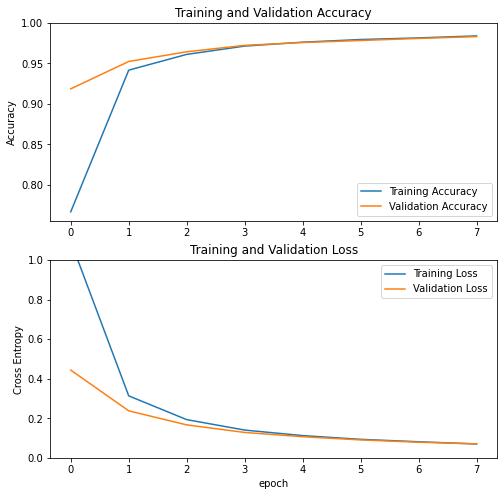

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [4]:
model = tf.keras.models.load_model('mobnetv2_flip.h5')
validation_steps=20
loss0,accuracy0 = model.evaluate(val_data, steps = validation_steps)

20/20 [==============================] - 8s 380ms/step - loss: 0.0274 - accuracy: 0.9953


In [6]:
NAME = 'mobilenetv2-{}'.format(1595092118)
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 29)                37149     
Total params: 2,295,133
Trainable params: 37,149
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
print(model.layers)

[<tensorflow.python.keras.engine.training.Model object at 0x7f48a83798b0>, <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f48a833aa60>, <tensorflow.python.keras.layers.core.Dense object at 0x7f48a1d6a040>]


In [9]:
base_model = model.layers[0]
print("Total number of layers in base model = {}".format(len(base_model.layers)))

Total number of layers in base model = 155


In [16]:
fine_tune_at = 153

In [17]:
base_model.trainable = True
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 29)                37149     
Total params: 2,295,133
Trainable params: 39,709
Non-trainable params: 2,255,424
_________________________________________________________________


In [19]:
epochs = 8
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,callbacks=[tensorboard])

Epoch 1/8
2266/2266 [==============================] - 1030s 454ms/step - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0577 - val_accuracy: 0.9828
Epoch 2/8
2266/2266 [==============================] - 1052s 464ms/step - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 3/8
2266/2266 [==============================] - 1012s 446ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 4/8
2266/2266 [==============================] - 1008s 445ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 5/8
2266/2266 [==============================] - 1021s 451ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/8
2266/2266 [==============================] - 1048s 463ms/step - loss: 0.0442 - accuracy: 0.9872 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 7/8
2266/2266 [==============================] - 1052s 464ms/step - loss: 0.0425 - accuracy: 0.9880 - val_

In [20]:
model.save('mobnetv2_flip.h5')

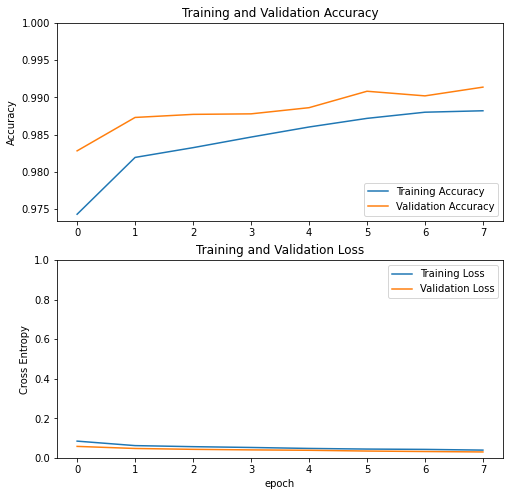

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [7]:
print (train_data.class_indices)

labels = '\n'.join(sorted(train_data.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [10]:
saved_model_dir = 'save/fine_tuned_mobnet'
tf.saved_model.save(model, saved_model_dir)



INFO:tensorflow:Assets written to: save/fine_tuned_mobnet/assets


INFO:tensorflow:Assets written to: save/fine_tuned_mobnet/assets


ConverterError: See console for info.
2020-08-01 13:40:40.395423: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:144] Ignored output_format.
2020-08-01 13:40:40.395525: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:147] Ignored drop_control_dependency.
2020-08-01 13:40:40.647069: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-01 13:40:40.670859: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2699905000 Hz
2020-08-01 13:40:40.671533: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3238000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-01 13:40:40.671601: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-08-01 13:40:40.726667: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-01 13:40:40.821865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:40.822290: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x58a41f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2020-08-01 13:40:40.822321: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce 940MX, Compute Capability 5.0
2020-08-01 13:40:40.822490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:40.822765: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 940MX computeCapability: 5.0
coreClock: 1.189GHz coreCount: 3 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 37.33GiB/s
2020-08-01 13:40:40.842859: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-01 13:40:40.879002: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-01 13:40:40.896933: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-08-01 13:40:40.926584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2020-08-01 13:40:40.955153: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2020-08-01 13:40:40.971210: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2020-08-01 13:40:41.015318: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-08-01 13:40:41.015628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:41.016591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:41.017314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1703] Adding visible gpu devices: 0
2020-08-01 13:40:41.017514: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-01 13:40:41.018589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-08-01 13:40:41.018656: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1108]      0 
2020-08-01 13:40:41.018698: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1121] 0:   N 
2020-08-01 13:40:41.019139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:41.020050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:40:41.020787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1247] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 28 MB memory) -> physical GPU (device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0)
2020-08-01 13:40:41.069627: I tensorflow/stream_executor/cuda/cuda_driver.cc:763] failed to allocate 28.94M (30343168 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2020-08-01 13:40:41.128399: F ./tensorflow/core/kernels/conv_2d_gpu.h:970] Non-OK-status: GpuLaunchKernel( SwapDimension1And2InTensor3UsingTiles<T, kNumThreads, kTileSize, kTileSize, conjugate>, total_tiles_count, kNumThreads, 0, d.stream(), input, input_dims, output) status: Internal: out of memory
Fatal Python error: Aborted

Current thread 0x00007f32cd79d740 (most recent call first):
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 50 in execute
  File "/home/jarvis/.local/lib/python3.8/site-packages/absl/app.py", line 250 in _run_main
  File "/home/jarvis/.local/lib/python3.8/site-packages/absl/app.py", line 299 in run
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 40 in run
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 93 in main
  File "/home/jarvis/.local/bin/toco_from_protos", line 8 in <module>
Aborted (core dumped)




In [2]:
saved_model_dir = 'save/fine_tuned_mobnet'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('mobnet_wflip.tflite', 'wb') as f:
    f.write(tflite_model)

ConverterError: See console for info.
2020-08-01 13:46:32.928081: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:144] Ignored output_format.
2020-08-01 13:46:32.928124: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:147] Ignored drop_control_dependency.
2020-08-01 13:46:32.993733: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-01 13:46:33.019183: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2699905000 Hz
2020-08-01 13:46:33.019466: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1ec0000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-01 13:46:33.019507: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-08-01 13:46:33.021640: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-01 13:46:33.309309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.309675: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7108e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2020-08-01 13:46:33.309696: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce 940MX, Compute Capability 5.0
2020-08-01 13:46:33.309862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.310121: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 940MX computeCapability: 5.0
coreClock: 1.189GHz coreCount: 3 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 37.33GiB/s
2020-08-01 13:46:33.310390: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-01 13:46:33.311772: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-01 13:46:33.313123: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-08-01 13:46:33.313456: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2020-08-01 13:46:33.314813: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2020-08-01 13:46:33.315521: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2020-08-01 13:46:33.318283: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2020-08-01 13:46:33.318451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.318772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.318991: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1703] Adding visible gpu devices: 0
2020-08-01 13:46:33.319039: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-01 13:46:33.319405: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-08-01 13:46:33.319421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1108]      0 
2020-08-01 13:46:33.319433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1121] 0:   N 
2020-08-01 13:46:33.319532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.319797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-01 13:46:33.320044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1247] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 175 MB memory) -> physical GPU (device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0)
2020-08-01 13:46:33.330876: I tensorflow/stream_executor/cuda/cuda_driver.cc:763] failed to allocate 175.69M (184221696 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2020-08-01 13:46:37.047250: F ./tensorflow/core/kernels/conv_2d_gpu.h:970] Non-OK-status: GpuLaunchKernel( SwapDimension1And2InTensor3UsingTiles<T, kNumThreads, kTileSize, kTileSize, conjugate>, total_tiles_count, kNumThreads, 0, d.stream(), input, input_dims, output) status: Internal: out of memory
Fatal Python error: Aborted

Current thread 0x00007f1f5ce25740 (most recent call first):
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 50 in execute
  File "/home/jarvis/.local/lib/python3.8/site-packages/absl/app.py", line 250 in _run_main
  File "/home/jarvis/.local/lib/python3.8/site-packages/absl/app.py", line 299 in run
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 40 in run
  File "/home/jarvis/.local/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 93 in main
  File "/home/jarvis/.local/bin/toco_from_protos", line 8 in <module>
Aborted (core dumped)


